# Project 2: Features, Galore: A Linear Regression Analysis on Home Features Predicting Sale Price

---

## Overview

The Ames Housing dataset was created by Dean De Cock for use in regression analysis and data science education. The data set describes the sale of residential properties in Ames, Iowa ranging from 2006 to 2010. This dataset is quite messy. The Ames Housing dataset contains 79 variables describing every aspect of residential homes in Ames, with the goal of predicting the sale price using regression techniques. This dataset has been used by Kaggle, a machine learning and data science community to host competitions for predicting Ames home sale price. The following project utilizes linear regression to predict Ames home sale prices, and also includes a kaggle submission portion. 

---

## Problem Statement 

A couple located in Ames, Iowa who wants to start a business flipping homes is looking to better understand which home features are worth upgrading. This project aims to identify which home features will most greatly impact home sale price using Linear Regression. An Ames, Iowa Housing Dataset will be analyzed to provide recommendations on which home upgrades are the most important to allocate resources, in order to produce a better return on investment. 

The data used for this project are from the following datasets: [Training Data](http://localhost:8889/files/project-2/datasets/train.csv?_xsrf=2%7Ca222a359%7C702501f8dda792abc9c0677b0185b861%7C1668018270), [Testing Data](http://localhost:8889/files/project-2/datasets/test.csv?_xsrf=2%7Ca222a359%7C702501f8dda792abc9c0677b0185b861%7C1668018270)

---

## Data Import and Cleaning 

This section examines an Ames Iowa Housing Dataset that looks at home features in relation to sale price. Raw data is often messy and needs to be cleaned before being suitable for Exploratory Data Analysis. The purpose of this section is to identify and fix any problems within the datasets.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading in the train.csv data 
data=pd.read_csv('train.csv')

In [3]:
#Head to see what the data looks like
data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#Info to look at datatypes, shape and missing (null values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

The Ames Housing Dataset contains 2051 rows and 80 columns. The columns for the dataset are shown above. The first column is'ID', which is a unique identifier. There is a mix between object, integer and float datatypes in this dataset. There are 23 nominal features, 22 ordinal features and 35 numerical features. 

The nominal (categorical) features in this dataset are PID, MS SubClass, MS Zoning, Street, Alley, Land Contour, Lot Config, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Roof Style, Roof Matl, Exterior 1, Exterior 2, 
Mas Vnr Type, Foundation, Heating, Central Air, Garage Type, Misc Feature and Sale Type. 

The ordinal (ordered categorical) features in this dataset are Lot Shape, Utilities, Land Slope, Overall Qual, Overall Cond, Exter Cond, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFinType 2, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, Garage Finish, Garage Qual, Garage Cond, Paved Drive, Pool QC and Fence. 

The remaining features are a mixture of discrete and continuous numerical features. 

Upon initial analysis, I will be converting all features names to lowercase snake-case. I will be turning 'MS SubClass' to object type, as was originally intended per the data dictionary. I will be changing 'Central Air' to binary numerical values, where 1 indicates yes to having central air, and 0 indicates no to having central air. Bsmt fin sf1, bsmt fin sf2, bsmt unf sf, total bsmt sf, garage cars and garage area all have minimal null values. These rows will be dropped. I will be converting wood deck sf, open porch sf, enclosed porch, 3ssn porch, screen porch and pool area to simplified columns of 'has feature', where 1 indicates yes to having the feature and 0 indicates no to having the feature. The original columns will be dropped from the dataframe. I will be dropping 'garage area' due to redundancy with 'garage cars', 'garage cond' due to redundancy with 'garage qual' and 'mas vnr area' for its redundancy with 'mas vnr type', which I presume will be a more important representation of masonry importance. 

While there are many null values that need to be addressed, this will be done after the data is split for the Linear Regression model. This is done to prevent data leakage from the training set into the testing set.

In [5]:
#Function from Ben to convert column names to snakecase 
import re 

def snake_case(df):
    new_cols = {col: re.sub(r"([a-z]{1})([A-Z]{1})", r"\1 \2", col).replace(" ", "_").lower() for col in df.columns}
    return df.rename(columns = new_cols, inplace = True)

In [6]:
#Applying function to dataframe 
snake_case(data)

In [7]:
data.head()

,id,pid,ms_sub_class,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_sub_class     2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [9]:
#Making data ms_sub_class an object
data['ms_sub_class']=data['ms_sub_class'].astype('str')

In [10]:
#Dropping rows with minimal null values 
(data.dropna(subset=['bsmt_fin_sf_1', 'bsmt_fin_sf_2','bsmt_unf_sf', 'total_bsmt_sf',
                     'garage_cars', 'garage_area'], inplace=True))

In [11]:
#Changing central air to binary b/c missing no values (1 and O)
data['central_air']=np.where(data['central_air']=='Y', 1, 0)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2049 non-null   int64  
 1   pid              2049 non-null   int64  
 2   ms_sub_class     2049 non-null   object 
 3   ms_zoning        2049 non-null   object 
 4   lot_frontage     1719 non-null   float64
 5   lot_area         2049 non-null   int64  
 6   street           2049 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2049 non-null   object 
 9   land_contour     2049 non-null   object 
 10  utilities        2049 non-null   object 
 11  lot_config       2049 non-null   object 
 12  land_slope       2049 non-null   object 
 13  neighborhood     2049 non-null   object 
 14  condition_1      2049 non-null   object 
 15  condition_2      2049 non-null   object 
 16  bldg_type        2049 non-null   object 
 17  house_style   

In [13]:
#Making new columns for variables that should be yes or no (ie. 1 for yes and 0 for no). No values need to be filled so okay now. 
data['has_wood_deck']=np.where(data['wood_deck_sf'] != 0, 1,0)
data['has_open_porch']=np.where(data['open_porch_sf'] != 0, 1,0)
data['has_enclosed_porch']=np.where(data['enclosed_porch']!= 0, 1,0)
data['has_3season_porch']=np.where(data['3ssn_porch'] != 0, 1, 0)
data['has_screen_porch']=np.where(data['screen_porch'] != 0, 1, 0)
data['has_pool']=np.where(data['pool_area'] != 0, 1, 0)

In [14]:
#Checking to make sure format was correct on new columns 
data.head()

,id,pid,ms_sub_class,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,mo_sold,yr_sold,sale_type,sale_price,has_wood_deck,has_open_porch,has_enclosed_porch,has_3season_porch,has_screen_porch,has_pool
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,3,2010,WD,130500,0,1,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,4,2009,WD,220000,0,1,0,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,1,2010,WD,109000,0,1,0,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,4,2010,WD,174000,1,0,0,0,0,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,3,2010,WD,138500,0,1,0,0,0,0


In [15]:
#Dropping old columns from dataframe 
data.drop(columns=['wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area'], inplace=True)

In [16]:
#Dropping 'garage_area' due to redundancy with 'garage_cars'
data.drop(columns=['garage_area'], inplace=True)

In [17]:
#Dropping because redundant with garage_qual 
data.drop(columns=['garage_cond'], inplace=True)

In [18]:
#Dropping because likely correlated with the mas_vnr_type and I think mas_vnr_type is more important
data.drop(columns=['mas_vnr_area'], inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 78 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2049 non-null   int64  
 1   pid                 2049 non-null   int64  
 2   ms_sub_class        2049 non-null   object 
 3   ms_zoning           2049 non-null   object 
 4   lot_frontage        1719 non-null   float64
 5   lot_area            2049 non-null   int64  
 6   street              2049 non-null   object 
 7   alley               140 non-null    object 
 8   lot_shape           2049 non-null   object 
 9   land_contour        2049 non-null   object 
 10  utilities           2049 non-null   object 
 11  lot_config          2049 non-null   object 
 12  land_slope          2049 non-null   object 
 13  neighborhood        2049 non-null   object 
 14  condition_1         2049 non-null   object 
 15  condition_2         2049 non-null   object 
 16  bldg_t

In [20]:
data.head()

,id,pid,ms_sub_class,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,mo_sold,yr_sold,sale_type,sale_price,has_wood_deck,has_open_porch,has_enclosed_porch,has_3season_porch,has_screen_porch,has_pool
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,3,2010,WD,130500,0,1,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,4,2009,WD,220000,0,1,0,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,1,2010,WD,109000,0,1,0,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,4,2010,WD,174000,1,0,0,0,0,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,3,2010,WD,138500,0,1,0,0,0,0


---
## Exploratory Data Analysis

This section presents intial impressions on raw summary statistics and underlying trends in features impacting Sale Price. I made sure to only look at relationships where null values were not present, as these values will be addressed in the next section.

### Summary Statistics

The table below contains raw summary statstics. Additional pre-processing will need to take place in order to provide additional insights on the data. More in depth final summary statistics tables will be presented in the next section. 

From this table we can see that the minimum home sale price is 12,789 (USD), while the maximum home sale price was 611,657 (USD). The mean home sale price was 181,534 (SD=79262). 



In [21]:
#Raw summary statistics 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2049.0,1.473726e+03,8.442194e+02,1.0,753.0,1486.0,2197.0,2930.0
pid,2049.0,7.134015e+08,1.886873e+08,526301100.0,528458130.0,535453160.0,907180040.0,924152030.0
lot_frontage,1719.0,6.904887e+01,2.325843e+01,21.0,58.0,68.0,80.0,313.0
lot_area,2049.0,1.006771e+04,6.745127e+03,1300.0,7500.0,9434.0,11515.0,159000.0
overall_qual,2049.0,6.113714e+00,1.425991e+00,1.0,5.0,6.0,7.0,10.0
overall_cond,2049.0,5.561249e+00,1.104537e+00,1.0,5.0,5.0,6.0,9.0
year_built,2049.0,1.971745e+03,3.016806e+01,1872.0,1954.0,1974.0,2001.0,2010.0
year_remod/add,2049.0,1.984200e+03,2.103041e+01,1950.0,1965.0,1993.0,2004.0,2010.0
bsmt_fin_sf_1,2049.0,4.422489e+02,4.613108e+02,0.0,0.0,368.0,734.0,5644.0
bsmt_fin_sf_2,2049.0,4.798243e+01,1.650378e+02,0.0,0.0,0.0,0.0,1474.0


Outliers can skew modeling results. To address outliers, I first plotted sale price based on square footage of above ground living area. This gave a visual representation of our outliers. I then used a boolen mask to find all of the homes that are greater than 4000 sq feet. These rows were then removed from the dataset. I wanted to make sure basement square footage outliers were also addressed. The same method was applied. There were no clear outliers to remove from basement living area after addressing the main living area. 

Distributions of overall home quality and home condition in relation to Sale Price were examined. As overall home quality (fit and finish of materials) increases, sale price also increases. Homes with a score of 5/9 for overall condition typically had higher sale prices, with the most outliers out of any other group. 

Kitchen quality, lot square footage and neighborhood were also visualized. 

The top features most highly correlated to sale price were also examined. These features were overall quality, square footage of above ground living area, total basement square footage, how many cars could fit in the garage, first floor square footage, year built, year remodeled and number of full size bathrooms. 

Finally, distributions of engineered features were analyzed to see their impact on sale price. Both having a pool and having an enclosed porch did not positively impact sale price, while having an open porch, a three season porch and porch with a screen did positively impact sale price. 

This initial analysis is not enough to answer the problem statement. Additional data cleaning, pre-processing and modeling will need to take place to fully answer the problem statement.

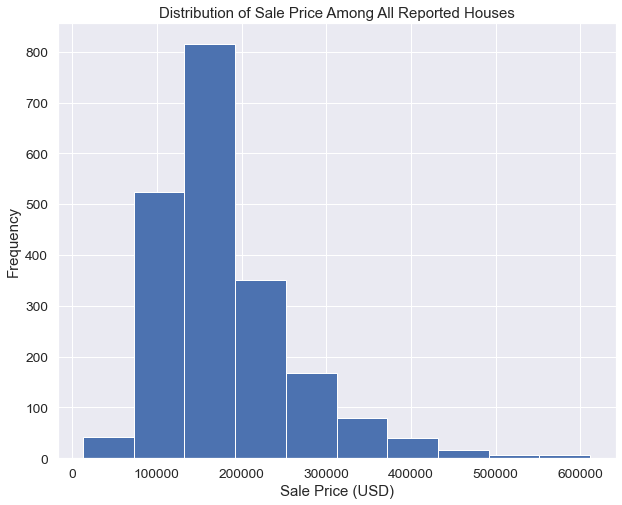

In [55]:
#Sale price distribution 
plt.figure(figsize=(10,8))
plt.hist(data['sale_price'])
plt.title('Distribution of Sale Price Among All Reported Houses')
plt.xlabel('Sale Price (USD)')
plt.ylabel('Frequency');

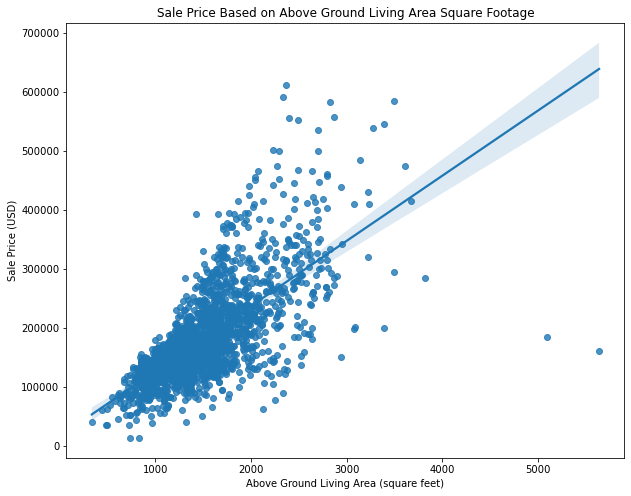

In [22]:
#Finding and removing outliers 
plt.figure(figsize=(10,8))
sns.regplot(x=data['gr_liv_area'], y=data['sale_price'])
plt.title('Sale Price Based on Above Ground Living Area Square Footage')
plt.ylabel('Sale Price (USD)')
plt.xlabel('Above Ground Living Area (square feet)');

In [23]:
#Find outliers 
outliers = (data['gr_liv_area'] > 4000)
data.loc[outliers]

,id,pid,ms_sub_class,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,mo_sold,yr_sold,sale_type,sale_price,has_wood_deck,has_open_porch,has_enclosed_porch,has_3season_porch,has_screen_porch,has_pool
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,1,2008,New,160000,1,1,0,0,0,1
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,10,2007,New,183850,1,1,0,0,0,0


In [24]:
#Dropping outlier sq footage and re-setting index 
data.drop(index=[960, 1885], inplace=True)
data.reset_index(drop=True, inplace=True)

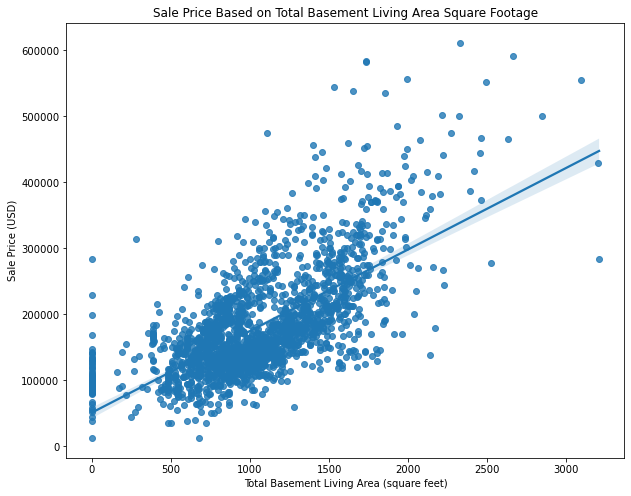

In [25]:
#Looking at outliers in total bsmt square footage after dropping above ground sq ft 
plt.figure(figsize=(10,8))
sns.regplot(x=data['total_bsmt_sf'], y=data['sale_price'])
plt.title('Sale Price Based on Total Basement Living Area Square Footage')
plt.ylabel('Sale Price (USD)')
plt.xlabel('Total Basement Living Area (square feet)');

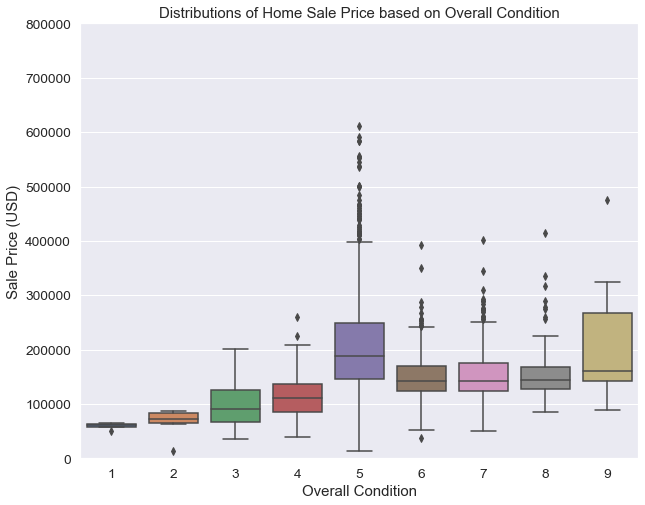

In [34]:
#box plot overallqual/saleprice
datas = pd.concat([data['sale_price'], data['overall_cond']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='overall_cond', y="sale_price", data=datas)
fig.axis(ymin=0, ymax=800000)
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price (USD)')
plt.title('Distributions of Home Sale Price based on Overall Condition');

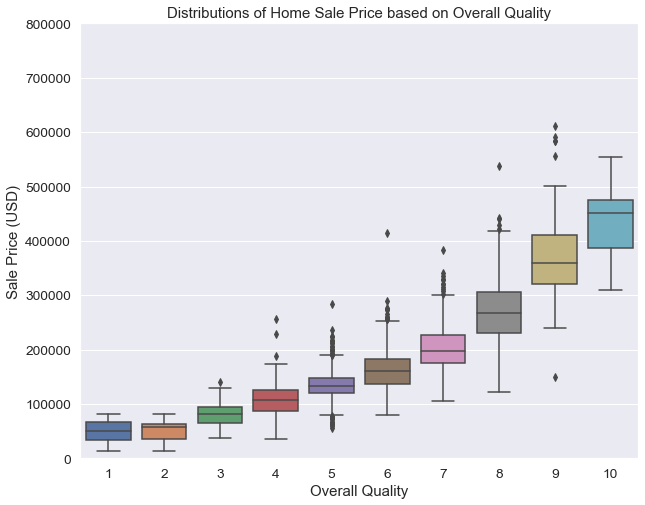

In [33]:
#box plot overallqual/saleprice
datasqu = pd.concat([data['sale_price'], data['overall_qual']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='overall_qual', y="sale_price", data=datasqu)
fig.axis(ymin=0, ymax=800000)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price (USD)')
plt.title('Distributions of Home Sale Price based on Overall Quality');

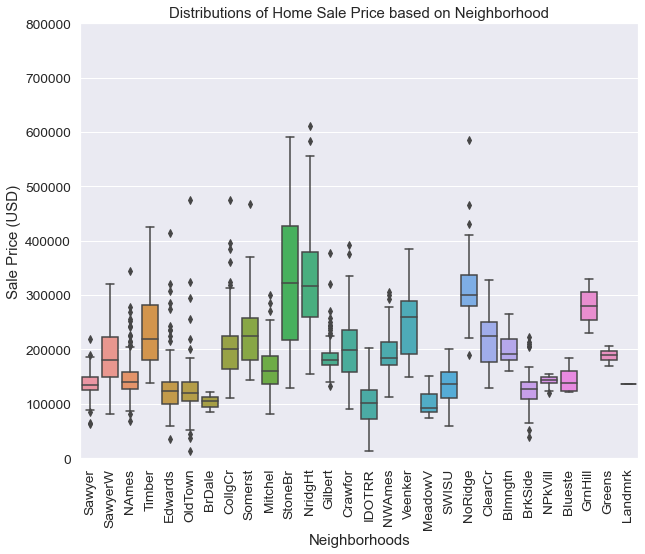

In [35]:
#Boxplot of neighborhoods 
neighbor = pd.concat([data['sale_price'], data['neighborhood']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='neighborhood', y="sale_price", data=neighbor)
fig.axis(ymin=0, ymax=800000)
plt.xlabel('Neighborhoods')
plt.ylabel('Sale Price (USD)')
plt.title('Distributions of Home Sale Price based on Neighborhood')
plt.xticks(rotation=90);


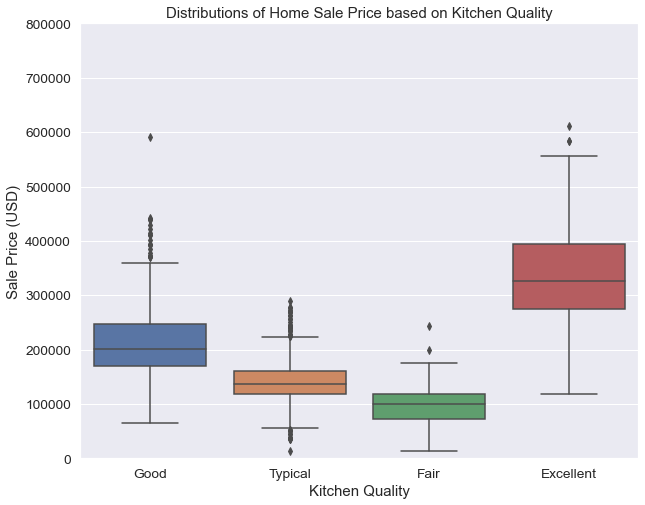

In [56]:
#Boxplot of kitchen quality 
kitchens = pd.concat([data['sale_price'], data['kitchen_qual']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='kitchen_qual', y="sale_price", data=kitchens)
fig.axis(ymin=0, ymax=800000)
plt.xlabel('Kitchen Quality')
plt.ylabel('Sale Price (USD)')
plt.title('Distributions of Home Sale Price based on Kitchen Quality')
labels=['Good', 'Typical', 'Fair', 'Excellent']
ax.set_xticklabels(labels);

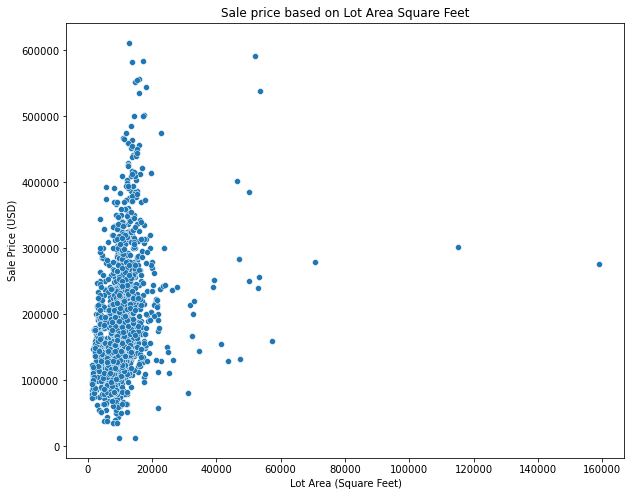

In [30]:
#Scatterplot of lot area
plt.figure(figsize=(10,8))
sns.scatterplot(x='lot_area', y='sale_price', data=data)
plt.title('Sale price based on Lot Area Square Feet')
plt.ylabel('Sale Price (USD)')
plt.xlabel('Lot Area (Square Feet)');

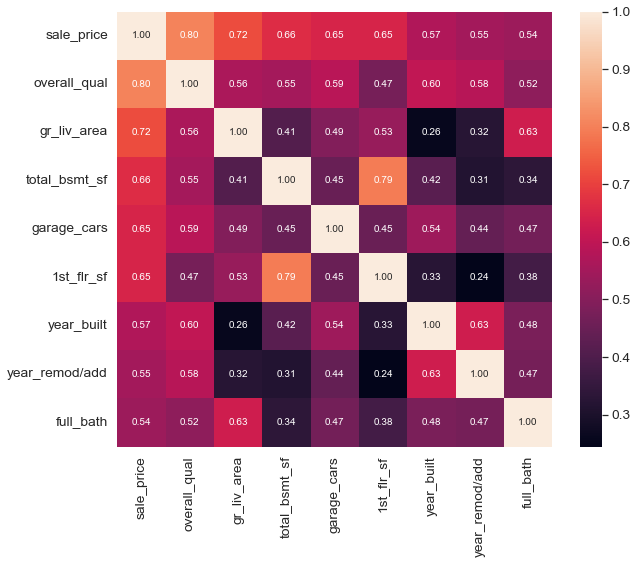

In [37]:
plt.figure(figsize=(10,8))
k = 9 #number of variables for heatmap
corrmat=data.corr()
cols = corrmat.nlargest(k, 'sale_price')['sale_price'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Looking at feature engineered columns to sale price 

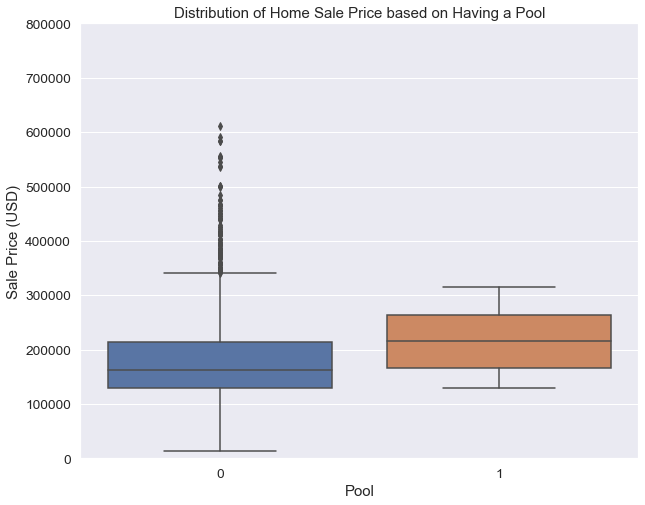

In [49]:
#Boxplot for 'has pool'
poolz = pd.concat([data['sale_price'], data['has_pool']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='has_pool', y="sale_price", data=poolz)
fig.axis(ymin=0, ymax=800000)
plt.xlabel('Pool')
plt.ylabel('Sale Price (USD)')
plt.title('Distribution of Home Sale Price based on Having a Pool');

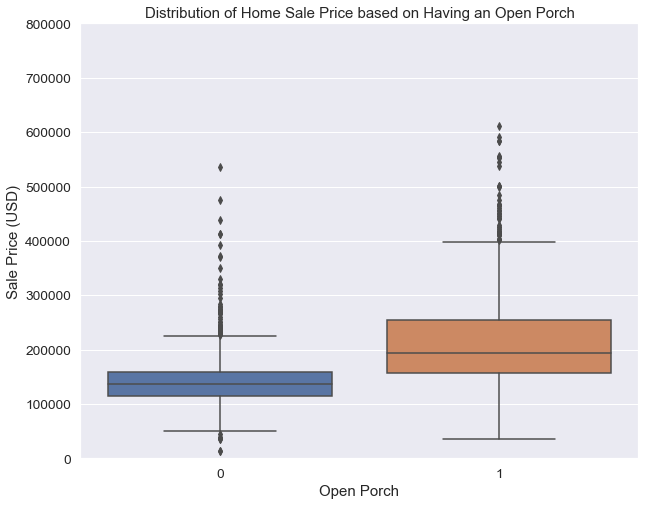

In [48]:
#Boxplot for 'has open porch'
porches = pd.concat([data['sale_price'], data['has_open_porch']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='has_open_porch', y="sale_price", data=porches)
fig.axis(ymin=0, ymax=800000)
plt.xlabel('Open Porch')
plt.ylabel('Sale Price (USD)')
plt.title('Distribution of Home Sale Price based on Having an Open Porch');

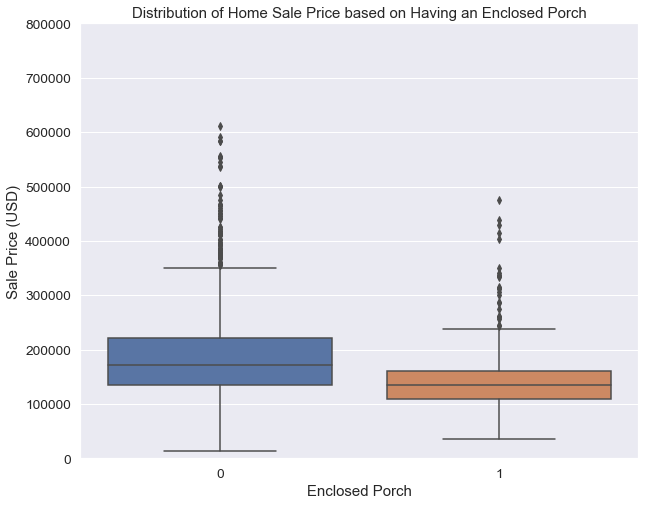

In [47]:
#Boxplot for 'has enclosed porch'
enclosedz = pd.concat([data['sale_price'], data['has_enclosed_porch']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='has_enclosed_porch', y="sale_price", data=enclosedz)
fig.axis(ymin=0, ymax=800000)
plt.xlabel('Enclosed Porch')
plt.ylabel('Sale Price (USD)')
plt.title('Distribution of Home Sale Price based on Having an Enclosed Porch');

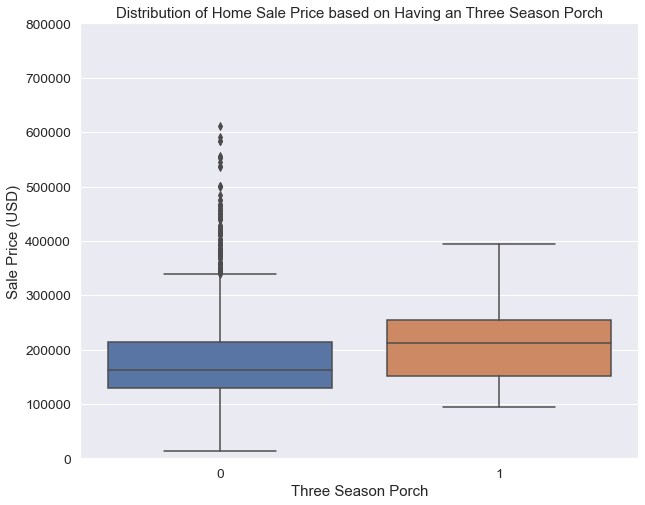

In [50]:
#Boxplot for 'has 3 season porch'
seasons = pd.concat([data['sale_price'], data['has_3season_porch']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='has_3season_porch', y="sale_price", data=seasons)
fig.axis(ymin=0, ymax=800000)
plt.xlabel('Three Season Porch')
plt.ylabel('Sale Price (USD)')
plt.title('Distribution of Home Sale Price based on Having an Three Season Porch');

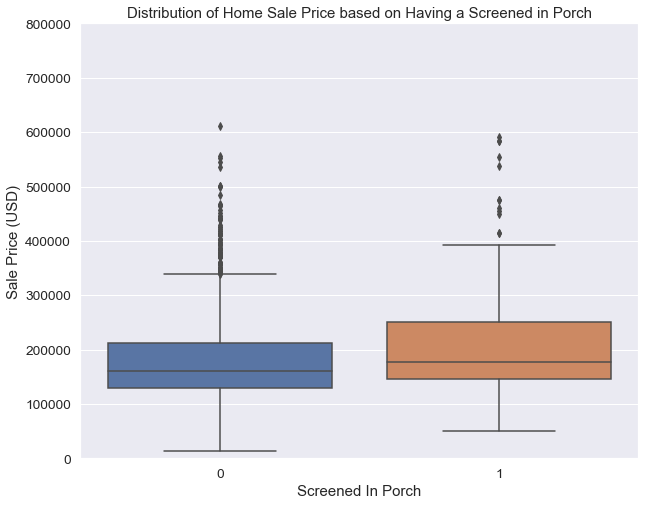

In [51]:
#Boxplot for 'has screen porch'
seasons = pd.concat([data['sale_price'], data['has_screen_porch']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='has_screen_porch', y="sale_price", data=seasons)
fig.axis(ymin=0, ymax=800000)
plt.xlabel('Screened In Porch')
plt.ylabel('Sale Price (USD)')
plt.title('Distribution of Home Sale Price based on Having a Screened in Porch');

In [32]:
#Saving the dataframe as a csv before moving on to pre-processing
data.to_csv('pre_cleaning.csv')